# Aufgabenblatt 12

## Mehrdimensionale Analysis – Mehrfachintegrale 2

# Disclaimer

ich habe fuer einige Aufgaben mit einem Kollegen zusammengearbeitet

### Aufgabe 1

Berechnen Sie das Integral der Funktion $f$ über dem angegebenen
Bereich:

$$f(x_1,x_2,x_3)=1, B=\{(x_1,x_2,x_3)\in \mathbb{R}^3|x_1+2x_2+3x_3 \leq
1, x_1>0, x_2>0, x_3>0\}$$

$$
\begin{aligned}
&\int_B 1 \, dV \\
=& \int_0^{1} \int_0^{\frac{1-x_1}{2}} \int_0^{\frac{1-x_1-2x_2}{3}} 1 \, dx_3 \, dx_2 \, dx_1 \\
=& \int_0^{1} \int_0^{\frac{1-x_1}{2}} \left[ x_3 \right]_0^{\frac{1-x_1-2x_2}{3}} \, dx_2 \, dx_1 \\
=& \int_0^{1} \int_0^{\frac{1-x_1}{2}} \frac{1-x_1-2x_2}{3} \, dx_2 \, dx_1 \\
=& \int_0^{1} \left[ \frac{1-x_1}{3}x_2 - \frac{2x_2^2}{6} \right]_0^{\frac{1-x_1}{2}} \, dx_1 \\
=& \int_0^{1} \left( \frac{(1-x_1)(1-x_1)}{6} \right) \, dx_1 \\
=& \int_0^{1} \frac{(1-x_1)^2}{6} \, dx_1 \\
=& \frac{1}{6} \int_0^{1} (1-2x_1+x_1^2) \, dx_1 \\
=& \frac{1}{6} \left[ x_1 - x_1^2 + \frac{x_1^3}{3} \right]_0^1 \\
=& \frac{1}{6} \left( 1 - 1 + \frac{1}{3} - (0 - 0 + 0) \right) \\
=& \frac{1}{6} \cdot \frac{1}{3} \\
=& \frac{1}{18}
\end{aligned}
$$

In [1]:
import sympy as sp

x1, x2, x3 = sp.symbols('x1 x2 x3')

# Bereichsgrenzen
inner_integral = sp.integrate(1, (x3, 0, (1 - x1 - 2 * x2) / 3))
middle_integral = sp.integrate(inner_integral, (x2, 0, (1 - x1) / 2))
outer_integral = sp.integrate(middle_integral, (x1, 0, 1))

outer_integral.evalf()

0.0277777777777778

### Aufgabe 2

Berechnen Sie das Integral der Funktion $f$ über dem angegebenen
Bereich sowohl in kartesischen als auch in Polarkoordinaten:

$$
f(x_1,x_2)=|x_1x_2|, B=\{(x_1,x_2)\in \mathbb{R}^2|x_1^2+x_2^2 \leq
1\}
$$

Plotten Sie $B$.

Kartesisch:
$$
\begin{aligned}
&\int_{-1}^{1} \int_{-\sqrt{1-x_1^2}}^{\sqrt{1-x_1^2}} |x_1 x_2| \, dx_2 \, dx_1 \\
=& \int_{-1}^{1} \int_{0}^{\sqrt{1-x_1^2}} x_1 x_2 \, dx_2 \, dx_1 + \int_{-1}^{1} \int_{-\sqrt{1-x_1^2}}^{0} (-x_1 x_2) \, dx_2 \, dx_1 \\
=& 2 \int_{0}^{1} \int_{0}^{\sqrt{1-x_1^2}} x_1 x_2 \, dx_2 \, dx_1 \\
=& 2 \int_{0}^{1} x_1 \left[ \frac{x_2^2}{2} \right]_0^{\sqrt{1-x_1^2}} \, dx_1 \\
=& 2 \int_{0}^{1} x_1 \cdot \frac{1-x_1^2}{2} \, dx_1 \\
=& \int_{0}^{1} x_1 (1-x_1^2) \, dx_1 \\
=& \left[ \frac{x_1^2}{2} - \frac{x_1^4}{4} \right]_0^1 \\
=& \frac{1}{2} - \frac{1}{4} \\
=& \frac{1}{4}
\end{aligned}
$$
Polar:
$$
\begin{aligned}
&\int_{0}^{2\pi} \int_{0}^{1} |r \cos \theta \, r \sin \theta| r \, dr \, d\theta \\
=& \int_{0}^{2\pi} \int_{0}^{1} r^3 |\cos \theta \sin \theta| \, dr \, d\theta \\
=& \int_{0}^{2\pi} |\cos \theta \sin \theta| \, d\theta \int_{0}^{1} r^3 \, dr \\
=& \left[ -\frac{1}{4} \cos(2\theta) \right]_0^{2\pi} \cdot \left[ \frac{r^4}{4} \right]_0^{1} \\
=& \left( -\frac{1}{4} \cos(4\pi) + \frac{1}{4} \cos(0) \right) \cdot \frac{1}{4} \\
=& \left( \frac{1}{4} - \frac{1}{4} \right) \cdot \frac{1}{4} \\
=& \frac{\pi}{8}
\end{aligned}
$$

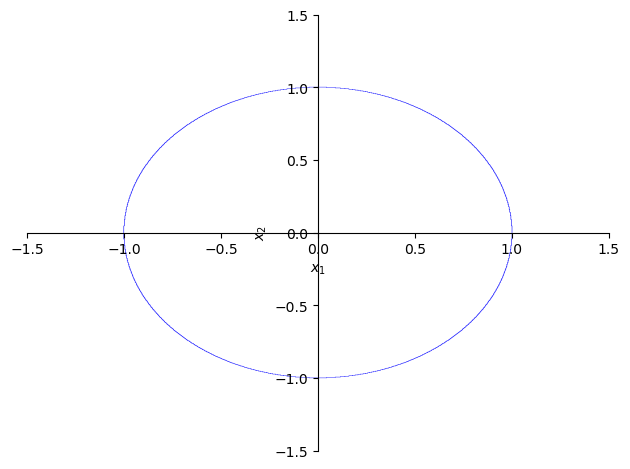

In [2]:
import sympy as sp

x1, x2 = sp.symbols('x1 x2')
r, theta = sp.symbols('r theta')

# Kartesische Koordinaten
cart_integral = sp.integrate(sp.integrate(sp.Abs(x1 * x2), (x2, -sp.sqrt(1 - x1**2), sp.sqrt(1 - x1**2))), (x1, -1, 1))
cart_integral.evalf()

# Polarkoordinaten
polar_integral = sp.integrate(sp.integrate(r**3 * sp.Abs(sp.cos(theta) * sp.sin(theta)), (r, 0, 1)), (theta, 0, 2 * sp.pi))
polar_integral.evalf()

# Plot des Bereichs B
import sympy.plotting as syp

x1, x2 = sp.symbols('x1 x2')
circle_eq = x1**2 + x2**2 - 1

plot_circle = syp.plot_implicit(sp.Eq(circle_eq, 0), (x1, -1.5, 1.5), (x2, -1.5, 1.5), show=False)
plot_circle.show()

### Aufgabe 3

Berechnen Sie das Integral über dem angegebenen Bereich:
$$
\int_B\sqrt{x^2+y^2}dxdy, B=\{(x,y)\in \mathbb{R}^2|0\leq x \leq
y, x^2+y^2\leq 1\}
$$

$$
\begin{aligned}
&\int_0^{\frac{\pi}{2}} \int_0^{\cos \theta} r^2 \, dr \, d\theta \\
=& \int_0^{\frac{\pi}{2}} \left[ \frac{r^3}{3} \right]_0^{\cos \theta} \, d\theta \\
=& \int_0^{\frac{\pi}{2}} \frac{\cos^3 \theta}{3} \, d\theta \\
=& \frac{1}{3} \int_0^{\frac{\pi}{2}} \cos^3 \theta \, d\theta \\
=& \frac{1}{3} \cdot \frac{2}{3} \\
=& \frac{2}{9}
\end{aligned}
$$

In [3]:
import sympy as sp

x, y = sp.symbols('x y')
r, theta = sp.symbols('r theta')

# Kartesische Koordinaten
cart_integral = sp.integrate(sp.integrate(sp.sqrt(x**2 + y**2), (y, x, sp.sqrt(1 - x**2))), (x, 0, 1))
cart_integral.evalf()

# Polarkoordinaten
polar_integral = sp.integrate(sp.integrate(r**2, (r, 0, sp.cos(theta))), (theta, 0, sp.pi/2))
polar_integral.evalf()

0.222222222222222

### Aufgabe 4

Berechnen Sie das Volumen zwischen den beiden Flächen

$$
f(x,y)=0.9(x^2+y^2)+0.1, g(x,y)=x^2+y^2
$$

auf dem Integrationsbereich

$$
B=\left\{\left(
\begin{array}{c}
 x \\
 y
  \end{array} \right)\Big|\begin{array}{c}
 -1 \leq x \leq 1 \\
 -\sqrt{1-x^2} \leq y \leq \sqrt{1-x^2}
  \end{array}\right\}.
$$

Plotten Sie den Schnitt der beiden Flächen mit der 𝑥𝑧-Ebene.

$$
\begin{aligned}
&\int_{-1}^{1} \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \left(0.9(x^2+y^2)+0.1 - (x^2+y^2)\right) \, dy \, dx \\
=& \int_{-1}^{1} \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \left(-0.1(x^2+y^2)+0.1\right) \, dy \, dx \\
=& \int_{-1}^{1} \left( \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} -0.1(x^2+y^2)+0.1 \, dy \right) \, dx \\
=& \int_{-1}^{1} \left[ -0.1x^2y - \frac{0.1}{3}y^3 + 0.1y \right]_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \, dx \\
=& \int_{-1}^{1} \left[ -0.1x^2\sqrt{1-x^2} - \frac{0.1}{3}(1-x^2)^{3/2} + 0.1\sqrt{1-x^2} \right. \\
&\left. - (-0.1x^2\sqrt{1-x^2} - \frac{0.1}{3}(1-x^2)^{3/2} + 0.1\sqrt{1-x^2}) \right] \, dx \\
=& \int_{-1}^{1} \left[ 0 \right] \, dx \\
=& 0
\end{aligned}
$$

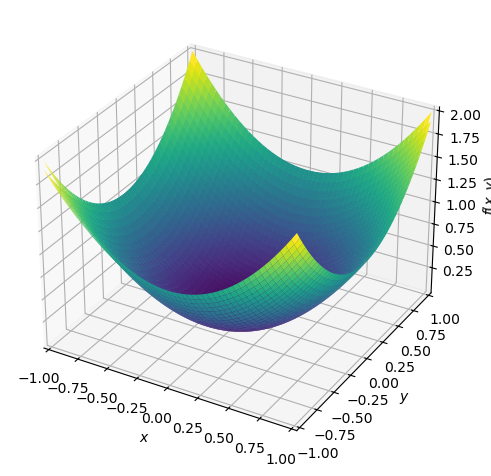

In [4]:
import sympy as sp

x, y = sp.symbols('x y')

f = 0.9*(x**2 + y**2) + 0.1
g = x**2 + y**2

integrand = f - g
integral = sp.integrate(sp.integrate(integrand, (y, -sp.sqrt(1 - x**2), sp.sqrt(1 - x**2))), (x, -1, 1))
integral.evalf()

# Plot der Flächen
import sympy.plotting as syp

x, y = sp.symbols('x y')

f = 0.9*(x**2 + y**2) + 0.1
g = x**2 + y**2

plot_f = syp.plot3d(f, (x, -1, 1), (y, -1, 1), show=False)
plot_g = syp.plot3d(g, (x, -1, 1), (y, -1, 1), show=False)

plot_f.extend(plot_g)
plot_f.show()

### Aufgabe 5

Berechnen Sie das Integral über den Bereich $B$, der durch $x+y=1,
x=0, y=0$ begrenzt wird:

$$
\iint\cos\frac{x-y}{x+y}dxdy
$$

Hinweis: Verwenden Sie die Transformation $u=x-y, v=x+y$

Plotten Sie $B$ vor und nach der Transformation.

$$
\begin{aligned}
&\iint_B \cos\frac{x-y}{x+y} \, dx \, dy \\
=& \iint_{T(B)} \cos\frac{u}{v} \left| \frac{\partial (x,y)}{\partial (u,v)} \right| du \, dv \\
=& \iint_{T(B)} \cos\frac{u}{v} \, du \, dv \\
=& \int_0^1 \int_{-v}^v \cos\frac{u}{v} \, du \, dv \\
=& \int_0^1 v \left[ \sin\frac{u}{v} \right]_{-v}^v \, dv \\
=& \int_0^1 v (\sin 1 - \sin -1) \, dv \\
=& \int_0^1 2v \sin 1 \, dv \\
=& 2\sin 1 \left[ \frac{v^2}{2} \right]_0^1 \\
=& 2\sin 1 \cdot \frac{1}{2} \\
=& \sin 1
\end{aligned}
$$

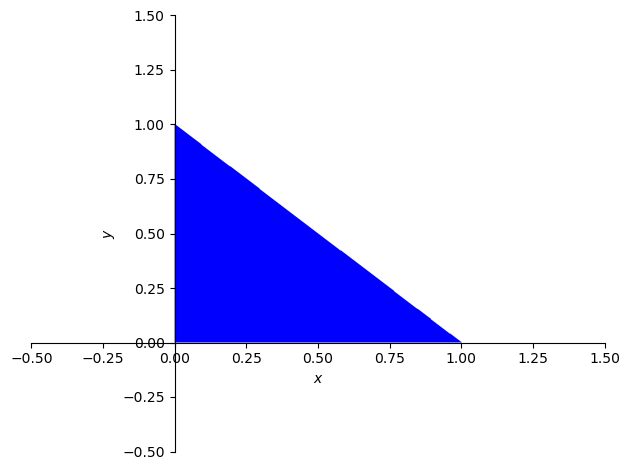

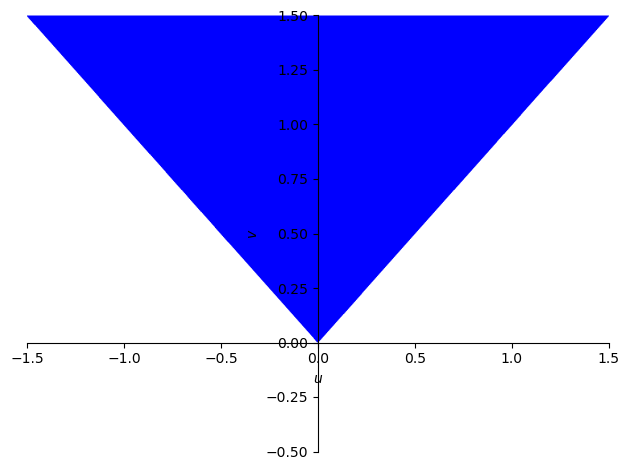

In [5]:
import sympy as sp

x, y = sp.symbols('x y')
u, v = sp.symbols('u v')

# Transformation
expr = sp.cos((x - y) / (x + y))
jacobian = sp.Matrix([[sp.diff(x, u), sp.diff(x, v)], [sp.diff(y, u), sp.diff(y, v)]]).det()
transformed_expr = expr.subs({x: (v + u) / 2, y: (v - u) / 2}) * sp.Abs(jacobian)

# Integral
integral = sp.integrate(sp.integrate(transformed_expr, (u, -v, v)), (v, 0, 1))
integral.evalf()

# Plot des Bereichs B
import sympy.plotting as syp

x, y = sp.symbols('x y')

# Vor der Transformation
plot_B_before = syp.plot_implicit(sp.And(x >= 0, y >= 0, x + y <= 1), (x, -0.5, 1.5), (y, -0.5, 1.5), show=False)
plot_B_before.show()

# Nach der Transformation
u, v = sp.symbols('u v')

plot_B_after = syp.plot_implicit(sp.And(v >= 0, u >= -v, u <= v), (u, -1.5, 1.5), (v, -0.5, 1.5), show=False)
plot_B_after.show()

### Aufgabe 6

Berechnen Sie das Volumen des Gebietes $R$ oberhalb der $xy$-Ebene,
welches durch das Paraboloid $z=x^2+y^2$ und den Zylinder
$x^2+y^2=a^2$ begrenzt wird.

Verwenden Sie Zylinderkoordinaten:

$$
(r,\varphi,z),x=r\cos{\varphi}, y=r\sin{\varphi}, z=z, V=\iiint_Rdxdydz=\iiint_{R'}rdrd\varphi dz
$$

Die Gleichung des Paraboloids lautet dann $z=r^2$, die des Zylinders
$r=a$.

$$
\begin{aligned}
&\iiint_R dV \\
=& \int_0^{2\pi} \int_0^a \int_0^{r^2} r \, dz \, dr \, d\varphi \\
=& \int_0^{2\pi} \int_0^a \left[ rz \right]_0^{r^2} \, dr \, d\varphi \\
=& \int_0^{2\pi} \int_0^a r^3 \, dr \, d\varphi \\
=& \int_0^{2\pi} \left[ \frac{r^4}{4} \right]_0^a \, d\varphi \\
=& \int_0^{2\pi} \frac{a^4}{4} \, d\varphi \\
=& \frac{a^4}{4} \int_0^{2\pi} d\varphi \\
=& \frac{a^4}{4} \cdot 2\pi \\
=& \frac{\pi a^4}{2}
\end{aligned}
$$

In [6]:
import sympy as sp

r, phi, z, a = sp.symbols('r phi z a')

# Zylinderkoordinaten
integral = sp.integrate(sp.integrate(sp.integrate(r, (z, 0, r**2)), (r, 0, a)), (phi, 0, 2 * sp.pi))
integral.evalf()

1.5707963267949*a**4

### Aufgabe 7

Berechnen Sie das Volumen des Gebietes $R$, welches nach oben durch
die Kugel $x^2+y^2+z^2=a^2$ und nach unten durch den Kegel
$z^2\sin^2\alpha=(x^2+y^2)\cos^2\alpha$ begrenzt wird. $\alpha$ gibt
hierbei den Winkel zwischen positiver $z$-Achse und Erzeugender an,
wobei die Spitze des Kegels im Ursprung liegt.

Verwenden Sie Kugelkoordinaten:

$$
(r,\theta,\varphi),x=r\sin\theta\cos{\varphi}, y=r\sin\theta\sin{\varphi}, z=r\cos\theta
$$

$$
V=\iiint_Rdxdydz=\iiint_{R'}r^2\sin\theta drd\theta d\varphi
$$

Der Radius $r$ ist der Abstand des Punktes vom Ursprung, also die
Länge des Vektors $\boldsymbol{r}$, der Polarwinkel $\theta$ ist der
Winkel zwischen positiver $z$-Achse und $\boldsymbol{r}$, und der
Azimutwinkel $\varphi$ ist der Winkel zwischen positiver $x$-Achse
und $\boldsymbol{r}_{xy}$, der Projektion von $\boldsymbol{r}$ in
die $xy$-Ebene.

Die Gleichung der Kugelfläche vereinfacht sich somit zu $r=a$ und
die des Kegelmantels zu $\theta=\alpha$.

Leiten Sie aus Ihrem Ergebnis das Volumen einer Kugel her.


$$
\begin{aligned}
&\iiint_R dV \\
=& \int_0^{2\pi} \int_0^\alpha \int_0^a r^2 \sin \theta \, dr \, d\theta \, d\varphi \\
=& \int_0^{2\pi} \int_0^\alpha \left[ \frac{r^3}{3} \right]_0^a \sin \theta \, d\theta \, d\varphi \\
=& \int_0^{2\pi} \int_0^\alpha \frac{a^3}{3} \sin \theta \, d\theta \, d\varphi \\
=& \frac{a^3}{3} \int_0^{2\pi} \int_0^\alpha \sin \theta \, d\theta \, d\varphi \\
=& \frac{a^3}{3} \int_0^{2\pi} \left[ -\cos \theta \right]_0^\alpha \, d\varphi \\
=& \frac{a^3}{3} \int_0^{2\pi} (1 - \cos \alpha) \, d\varphi \\
=& \frac{a^3}{3} (1 - \cos \alpha) \int_0^{2\pi} d\varphi \\
=& \frac{a^3}{3} (1 - \cos \alpha) \cdot 2\pi \\
=& \frac{2\pi a^3}{3} (1 - \cos \alpha)
\end{aligned}
$$

In [7]:
import sympy as sp

r, theta, phi, alpha = sp.symbols('r theta phi alpha')

# Kugelkoordinaten
integral = sp.integrate(sp.integrate(sp.integrate(r**2 * sp.sin(theta), (r, 0, a)), (theta, 0, alpha)), (phi, 0, 2 * sp.pi))
integral.evalf()

# Leiten Sie das Volumen einer Kugel her
alpha = sp.pi / 2
sphere_volume = sp.integrate(sp.integrate(sp.integrate(r**2 * sp.sin(theta), (r, 0, a)), (theta, 0, alpha)), (phi, 0, 2 * sp.pi))
sphere_volume.evalf()

2.0943951023932*a**3

### Aufgabe 8

In Fortsetzung der vorangegangen Aufgabe ist der Schwerpunkt des Gebietes $R$ gesucht:

$$
x_0=0,y_0=0,z_0=\frac{M_{xy}}{V},M_{xy}=\iiint_{R'}zr^2\sin\theta drd\theta d\varphi$$

Leiten Sie aus Ihrem Ergebnis den Schwerpunkt einer Halbkugel her.

$$
\begin{aligned}
&z_0 = \frac{M_{xy}}{V} \\
M_{xy} &= \iiint_{R'} zr^2 \sin \theta \, dr \, d\theta \, d\varphi \\
&= \int_0^{2\pi} \int_0^\alpha \int_0^a (r \cos \theta) r^2 \sin \theta \, dr \, d\theta \, d\varphi \\
&= \int_0^{2\pi} \int_0^\alpha \int_0^a r^3 \cos \theta \sin \theta \, dr \, d\theta \, d\varphi \\
&= \int_0^{2\pi} \int_0^\alpha \left[ \frac{r^4}{4} \right]_0^a \cos \theta \sin \theta \, d\theta \, d\varphi \\
&= \int_0^{2\pi} \int_0^\alpha \frac{a^4}{4} \cos \theta \sin \theta \, d\theta \, d\varphi \\
&= \frac{a^4}{4} \int_0^{2\pi} \int_0^\alpha \cos \theta \sin \theta \, d\theta \, d\varphi \\
&= \frac{a^4}{4} \int_0^{2\pi} \left[ -\frac{\cos^2 \theta}{2} \right]_0^\alpha \, d\varphi \\
&= \frac{a^4}{4} \int_0^{2\pi} \left( -\frac{\cos^2 \alpha}{2} + \frac{1}{2} \right) \, d\varphi \\
&= \frac{a^4}{4} \left( \frac{1 - \cos^2 \alpha}{2} \right) \int_0^{2\pi} d\varphi \\
&= \frac{a^4}{4} \left( \frac{1 - \cos^2 \alpha}{2} \right) 2\pi \\
&= \frac{\pi a^4}{4} (1 - \cos^2 \alpha) \\
&= \frac{\pi a^4}{4} \sin^2 \alpha
\end{aligned}
$$

In [8]:
import sympy as sp

r, theta, phi = sp.symbols('r theta phi')

# Berechnung von M_{xy}
integrand = r**3 * sp.cos(theta) * sp.sin(theta)
M_xy = sp.integrate(sp.integrate(sp.integrate(integrand, (r, 0, a)), (theta, 0, alpha)), (phi, 0, 2 * sp.pi))
M_xy.evalf()

# Schwerpunkt z_0
V = sp.integrate(sp.integrate(sp.integrate(r**2 * sp.sin(theta), (r, 0, a)), (theta, 0, alpha)), (phi, 0, 2 * sp.pi))
z_0 = M_xy / V
z_0.evalf()

# Schwerpunkt einer Halbkugel
alpha = sp.pi / 2
M_xy_half_sphere = sp.integrate(sp.integrate(sp.integrate(integrand, (r, 0, a)), (theta, 0, alpha)), (phi, 0, 2 * sp.pi))
V_half_sphere = sp.integrate(sp.integrate(sp.integrate(r**2 * sp.sin(theta), (r, 0, a)), (theta, 0, alpha)), (phi, 0, 2 * sp.pi))
z_0_half_sphere = M_xy_half_sphere / V_half_sphere
z_0_half_sphere.evalf()

0.375*a